# Machine Learning : Projet Real Estate

### Preprocessing + (...)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import keras
import random

In [32]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
X_train_path = "X_train_J01Z4CN.csv"   # Ouverture et conversion en dataframe du X d'entrainement
X_train = pd.read_csv(X_train_path)
print(X_train.dtypes) # Liste des paramètres dans le X ainsi que leur type
X_train.shape # 5 premières lignes de la Dataframe

id_annonce                       int64
property_type                   object
approximate_latitude           float64
approximate_longitude          float64
city                            object
postal_code                      int64
size                           float64
floor                          float64
land_size                      float64
energy_performance_value       float64
energy_performance_category     object
ghg_value                      float64
ghg_category                    object
exposition                      object
nb_rooms                       float64
nb_bedrooms                    float64
nb_bathrooms                   float64
nb_parking_places              float64
nb_boxes                       float64
nb_photos                      float64
has_a_balcony                  float64
nb_terraces                    float64
has_a_cellar                   float64
has_a_garage                   float64
has_air_conditioning           float64
last_floor               

(37368, 27)

In [3]:
y_train_path = "y_train_OXxrJt1.csv"    # Ouverture et conversion en dataframe du y d'entrainement
y_train = pd.read_csv(y_train_path)
#y_train.head(5)

In [4]:
"""Création d'un unique dataframe combinant les prix et les attributs de chaque bien"""
df=X_train.copy()
df.insert(1, 'price', y_train['price'])
#df.head()

In [5]:
df['price'].head()

0    355000.0
1    190000.0
2     39000.0
3    299000.0
4    478000.0
Name: price, dtype: float64

### Preprocessing

On enlève les paramètres que l'on juge moins utiles (on va utiliser lat et long au lieu de la ville/code postal).

In [6]:
df=df.drop(columns=['city','postal_code','energy_performance_category','ghg_category','exposition','nb_photos'])

On fixe l'étage à 0 pour les maisons :

In [7]:
df[df['property_type']=="maison"]=df[df['property_type']=="maison"].assign(floor=0.0)
df[df['property_type']=="maison"].loc[:,'floor']

2        0.0
3        0.0
7        0.0
8        0.0
9        0.0
        ... 
37351    0.0
37355    0.0
37356    0.0
37357    0.0
37367    0.0
Name: floor, Length: 15675, dtype: float64

On fixe le land_size des appartement à la size.

In [8]:
df[df['property_type']=="appartement"]=df[df['property_type']=="appartement"].assign(land_size=0.0)

In [9]:
df[df['property_type']=="appartement"]['land_size']

0        0.0
1        0.0
4        0.0
5        0.0
6        0.0
        ... 
37359    0.0
37362    0.0
37363    0.0
37364    0.0
37365    0.0
Name: land_size, Length: 15733, dtype: float64

In [10]:
""" % de NaN par colonne"""
print((df[df['property_type']=="appartement"].isna().sum()*100/df[df['property_type']=="appartement"].shape[0]).sort_values(ascending=True))

id_annonce                   0.000000
has_air_conditioning         0.000000
has_a_garage                 0.000000
has_a_cellar                 0.000000
nb_terraces                  0.000000
has_a_balcony                0.000000
nb_boxes                     0.000000
nb_parking_places            0.000000
last_floor                   0.000000
upper_floors                 0.000000
land_size                    0.000000
approximate_longitude        0.000000
approximate_latitude         0.000000
property_type                0.000000
price                        0.000000
nb_rooms                     0.355940
size                         0.648319
nb_bedrooms                  7.131507
nb_bathrooms                37.310113
floor                       38.994470
energy_performance_value    50.746838
ghg_value                   51.840081
dtype: float64


In [11]:
""" % de NaN par colonne"""
print((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True))

id_annonce                   0.000000
has_air_conditioning         0.000000
has_a_garage                 0.000000
has_a_cellar                 0.000000
nb_terraces                  0.000000
has_a_balcony                0.000000
nb_boxes                     0.000000
nb_parking_places            0.000000
last_floor                   0.000000
upper_floors                 0.000000
approximate_longitude        0.000000
approximate_latitude         0.000000
property_type                0.000000
price                        0.000000
size                         1.370156
nb_rooms                     4.190751
nb_bedrooms                  7.313744
land_size                   17.929779
floor                       31.979234
nb_bathrooms                35.519696
energy_performance_value    48.972383
ghg_value                   50.412117
dtype: float64


On choisit, pour les appartements où le nombre de salles de bains n'est pas spécifié, de fixer ce nombre à 1.

In [12]:
df[df['property_type']=="maison"]=df[df['property_type']=="maison"].assign(nb_bathrooms=1.0,inplace=True)
df[df['property_type']=="appartement"]=df[df['property_type']=="appartement"].assign(nb_bathrooms=1.0,inplace=True)

In [13]:
""" % de NaN par colonne"""
print((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True))

id_annonce                   0.000000
has_air_conditioning         0.000000
has_a_garage                 0.000000
has_a_cellar                 0.000000
nb_terraces                  0.000000
has_a_balcony                0.000000
nb_boxes                     0.000000
nb_parking_places            0.000000
last_floor                   0.000000
upper_floors                 0.000000
approximate_longitude        0.000000
approximate_latitude         0.000000
property_type                0.000000
price                        0.000000
size                         1.370156
nb_rooms                     4.190751
nb_bathrooms                 6.674160
nb_bedrooms                  7.313744
land_size                   17.929779
floor                       31.979234
energy_performance_value    48.972383
ghg_value                   50.412117
dtype: float64


<AxesSubplot: >

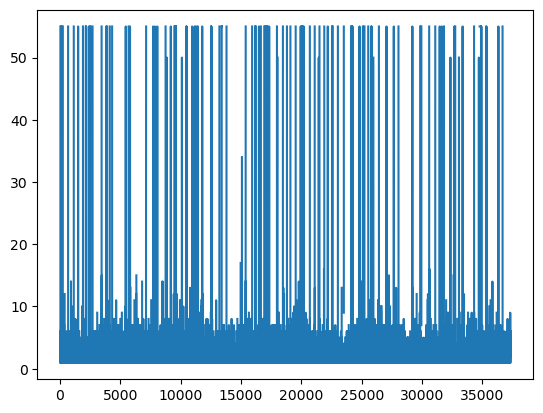

In [14]:
df[df['property_type']=='appartement']['floor'].plot()

(Peut-être ajouter d'autres spécificités sur la moyenne)

In [15]:
type_biens=list(set(list(df['property_type'].values)))
type_biens.remove('appartement')
for bien in type_biens:
#    if df[df['property_type']=="appartement"]['floor'].mean()= np.nan:
    df.loc[df['property_type']==bien,'floor']=df.loc[df['property_type']==bien,'floor'].fillna((df[df['property_type']==bien]['floor']).mean())
    df.loc[df['property_type']==bien,'floor']=df.loc[df['property_type']==bien,'floor'].fillna(0.0)

In [16]:
df.loc[df['property_type']=='duplex','floor']

26        5.195804
97        1.000000
172       5.195804
178       1.000000
280       5.195804
           ...    
36557     1.000000
36639    55.000000
36700     1.000000
37187     2.000000
37366     5.195804
Name: floor, Length: 220, dtype: float64

In [17]:
""" % de NaN par colonne"""
print((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True))

id_annonce                   0.000000
has_air_conditioning         0.000000
has_a_garage                 0.000000
has_a_cellar                 0.000000
nb_terraces                  0.000000
has_a_balcony                0.000000
nb_boxes                     0.000000
nb_parking_places            0.000000
last_floor                   0.000000
upper_floors                 0.000000
approximate_longitude        0.000000
approximate_latitude         0.000000
property_type                0.000000
price                        0.000000
size                         1.370156
nb_rooms                     4.190751
nb_bathrooms                 6.674160
nb_bedrooms                  7.313744
floor                       16.417791
land_size                   17.929779
energy_performance_value    48.972383
ghg_value                   50.412117
dtype: float64


On enlève les données énergétique et d'émission :

In [18]:
df.drop(columns=['energy_performance_value','ghg_value'],inplace=True)

In [19]:
for bien in type_biens:

    df.loc[df['property_type']==bien,'land_size']=df.loc[df['property_type']==bien,'land_size'].fillna((df[df['property_type']==bien]['land_size']).mean())
    df.loc[df['property_type']==bien,'land_size']=df.loc[df['property_type']==bien,'land_size'].fillna(0.0)

In [20]:
""" % de NaN par colonne"""
print((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True))

id_annonce                0.000000
has_air_conditioning      0.000000
has_a_garage              0.000000
has_a_cellar              0.000000
nb_terraces               0.000000
has_a_balcony             0.000000
nb_boxes                  0.000000
nb_parking_places         0.000000
last_floor                0.000000
upper_floors              0.000000
land_size                 0.000000
approximate_longitude     0.000000
approximate_latitude      0.000000
property_type             0.000000
price                     0.000000
size                      1.370156
nb_rooms                  4.190751
nb_bathrooms              6.674160
nb_bedrooms               7.313744
floor                    16.417791
dtype: float64


In [21]:
df.shape[0]

37368

Toutes les valeurs manquantes pour le floor correspondent à des appartements, on choisis de les enlever pour l'entrainement.

In [22]:
df=df.dropna()
df.shape[0]

27730

In [23]:
""" % de NaN par colonne"""
print((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True))

id_annonce               0.0
has_air_conditioning     0.0
has_a_garage             0.0
has_a_cellar             0.0
nb_terraces              0.0
has_a_balcony            0.0
nb_boxes                 0.0
nb_parking_places        0.0
nb_bathrooms             0.0
nb_bedrooms              0.0
nb_rooms                 0.0
land_size                0.0
floor                    0.0
size                     0.0
approximate_longitude    0.0
approximate_latitude     0.0
property_type            0.0
price                    0.0
last_floor               0.0
upper_floors             0.0
dtype: float64


On choisis d'enlever la ville, étant donné qu'on a le code postal

### Encodage

In [24]:
df.set_index('id_annonce',inplace=True)

In [25]:
df.dtypes

price                    float64
property_type             object
approximate_latitude     float64
approximate_longitude    float64
size                     float64
floor                    float64
land_size                float64
nb_rooms                 float64
nb_bedrooms              float64
nb_bathrooms             float64
nb_parking_places        float64
nb_boxes                 float64
has_a_balcony            float64
nb_terraces              float64
has_a_cellar             float64
has_a_garage             float64
has_air_conditioning     float64
last_floor               float64
upper_floors             float64
dtype: object

In [26]:
df.corr()['price']

price                    1.000000
approximate_latitude     0.026049
approximate_longitude    0.114318
size                     0.015261
floor                    0.115925
land_size                0.027642
nb_rooms                 0.289252
nb_bedrooms              0.313925
nb_bathrooms             0.202406
nb_parking_places        0.074233
nb_boxes                 0.017086
has_a_balcony            0.075653
nb_terraces              0.127947
has_a_cellar             0.159152
has_a_garage             0.029625
has_air_conditioning     0.066625
last_floor               0.053412
upper_floors            -0.005352
Name: price, dtype: float64

In [27]:
df.head()

,price,property_type,approximate_latitude,approximate_longitude,size,floor,land_size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,
35811033,190000.0,appartement,45.695757,4.895610,90.0,3.0,0.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35731841,39000.0,maison,47.966791,-1.220451,61.0,0.0,370.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35886765,299000.0,maison,47.289292,-1.878805,142.0,0.0,764.0,4.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35781137,478000.0,appartement,45.718992,4.844234,88.0,3.0,0.0,4.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36049101,2050000.0,appartement,48.884067,2.270220,1758.0,5.0,0.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On encode les valeurs de type de propriété :

In [28]:
df=pd.get_dummies(df,columns=['property_type'])


In [29]:
df.head()

,price,approximate_latitude,approximate_longitude,size,floor,land_size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,...,property_type_maison,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa
id_annonce,,,,,,,,,,,,,,,,,,,,,
35811033,190000.0,45.695757,4.895610,90.0,3.0,0.0,5.0,4.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
35731841,39000.0,47.966791,-1.220451,61.0,0.0,370.0,2.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
35886765,299000.0,47.289292,-1.878805,142.0,0.0,764.0,4.0,3.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
35781137,478000.0,45.718992,4.844234,88.0,3.0,0.0,4.0,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
36049101,2050000.0,48.884067,2.270220,1758.0,5.0,0.0,6.0,3.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.columns

Index(['price', 'approximate_latitude', 'approximate_longitude', 'size',
       'floor', 'land_size', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms',
       'nb_parking_places', 'nb_boxes', 'has_a_balcony', 'nb_terraces',
       'has_a_cellar', 'has_a_garage', 'has_air_conditioning', 'last_floor',
       'upper_floors', 'property_type_appartement', 'property_type_atelier',
       'property_type_chalet', 'property_type_château', 'property_type_divers',
       'property_type_duplex', 'property_type_ferme', 'property_type_gîte',
       'property_type_hôtel particulier', 'property_type_loft',
       'property_type_maison', 'property_type_manoir', 'property_type_moulin',
       'property_type_parking', 'property_type_propriété',
       'property_type_péniche', 'property_type_terrain',
       'property_type_terrain à bâtir', 'property_type_viager',
       'property_type_villa'],
      dtype='object')

## Modèles : Réseaux de neurones

In [33]:
# On split les données
from sklearn.model_selection import train_test_split


# 0n importe tout ce qu'on a besoin pour le reseau
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras import activations

#On normalise tout et on garde les valeurs pour l'affichage
mu = df['price'].mean()
sigma = df['price'].std()
#A la fin on remultplie par sigma et on ajoute mu aux données prédites pour revenir aux prix
normalized_df=(df-df.min())/(df.max()-df.min())
print('Prix moyen:', int(mu), '€')
print('Prix std:',int(sigma),'€')


X = normalized_df.drop(columns=['price'])
y = normalized_df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) #On découpe les données pour faire les calculs
input_shape = (len(df.columns)-1,)
print(y.head())

ModuleNotFoundError: No module named 'sklearn.model_selection'

Réseau 1

In [ ]:
model1 = Sequential()

hyp1 = {'learning_rate' : 0.00005,
        'batch_size' : 64,
        'epochs' : 10}

model1.add(Dense(20, input_shape=input_shape, name = 'Input'))
model1.add(Dense(10,activation = 'sigmoid',name='relu1'))
model1.add(Dense(1,activation = 'sigmoid',name='output'))

model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adagrad(learning_rate = hyp1['learning_rate'],),
    metrics=['accuracy'])

model1.summary()

history = model1.fit(X_train,y_train,
                     epochs = hyp1['epochs'],
                     batch_size = hyp1['batch_size'],
                     verbose = 1,
                     validation_data=(X_test,y_test))

score = model1.evaluate(X_test, y_test, verbose=0)
print(y_train[:8],y_test[:8])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['accuracy'], lw=3, label='Training')
plt.plot(history.epoch, history.history['val_accuracy'], lw=3, label='Testing')
plt.legend(fontsize=14)
plt.title('Accuracy of regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

